In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\DeepLearning-TensorFlow'))
	print(os.getcwd())
except:
	pass


Toy Classification

In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [57]:
'''Generating Synthetic Data
We want two distinct classes of points, which are easily separated. The dataset consists
of only two types of points, (–1, –1) and (1, 1). Learning algorithm would have
to learn a rule that separates these two data values
y0 = (-1, -1)
y1 = (1, 1)

Adding Some Gaussian Noise
y0 = y0 + N(0, ϵ)
y1 = y1 + N(0, ϵ)
'''
N = 100
x0 = np.random.multivariate_normal(mean=[-1, -1], 
    cov=0.1*np.eye(2), size=(int(N/2),))
y0 = np.zeros((int(N/2),))

x1 = np.random.multivariate_normal(mean=[1, 1], 
    cov=0.1*np.eye(2), size=(int(N/2),))
y1 = np.ones((int(N/2),))

In [58]:
X = np.vstack([x0, x1])
Y = np.concatenate([y0, y1])

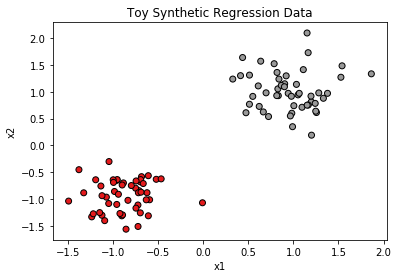

In [59]:
plt.scatter(X[:,0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Synthetic Regression Data')
plt.show()

In [60]:
'''Logistic Regression Model'''
tf.reset_default_graph()                  #Reset all previous tf sessions
with tf.name_scope('placeholders'):
    x = tf.placeholder(tf.float32, (N, 2))
    y = tf.placeholder(tf.float32, (N,))
with tf.name_scope('weights'):
    w = tf.Variable(tf.random_normal((2, 1)))
    b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope('prediction'):
    y_logit = tf.squeeze(tf.matmul(x, w) + b)
    y_one_prob = tf.sigmoid(y_logit)    #sigmoid gives the class probability of 1
    y_pred = tf.round(y_one_prob)       #Rounding P(y=1) will give the correct prediction

with tf.name_scope('loss'):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y) #calculate cross-entropy term for each datapoint
    l = tf.reduce_sum(entropy)  #sum all contributions

with tf.name_scope('optimizer'):
    train = tf.train.AdamOptimizer(0.01).minimize(l)

with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('/tf_logdir/logi-train', tf.get_default_graph())

In [61]:
epoc = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epoc):
        _, summary, loss = sess.run([train, merged, l], feed_dict={
            x: X,
            y: Y
        })
        print("Step: %d, Loss: %f" %(i, loss))
        train_writer.add_summary(summary, i)

    w_final, b_final = sess.run([w, b])
    print("w: {}, b: {}".format(w_final.reshape(-1), b_final))

    Y_pred = sess.run(y_pred, feed_dict={x: X})    

Step: 0, Loss: 26.676218
Step: 1, Loss: 26.141762
Step: 2, Loss: 25.617252
Step: 3, Loss: 25.102745
Step: 4, Loss: 24.598293
Step: 5, Loss: 24.103924
Step: 6, Loss: 23.619659
Step: 7, Loss: 23.145508
Step: 8, Loss: 22.681456
Step: 9, Loss: 22.227478
Step: 10, Loss: 21.783545
Step: 11, Loss: 21.349600
Step: 12, Loss: 20.925579
Step: 13, Loss: 20.511410
Step: 14, Loss: 20.107008
Step: 15, Loss: 19.712273
Step: 16, Loss: 19.327095
Step: 17, Loss: 18.951351
Step: 18, Loss: 18.584917
Step: 19, Loss: 18.227659
Step: 20, Loss: 17.879427
Step: 21, Loss: 17.540073
Step: 22, Loss: 17.209438
Step: 23, Loss: 16.887360
Step: 24, Loss: 16.573668
Step: 25, Loss: 16.268194
Step: 26, Loss: 15.970758
Step: 27, Loss: 15.681188
Step: 28, Loss: 15.399298
Step: 29, Loss: 15.124910
Step: 30, Loss: 14.857837
Step: 31, Loss: 14.597900
Step: 32, Loss: 14.344916
Step: 33, Loss: 14.098704
Step: 34, Loss: 13.859081
Step: 35, Loss: 13.625866
Step: 36, Loss: 13.398886
Step: 37, Loss: 13.177959
Step: 38, Loss: 12.962

In [62]:
'''Metrics for evaluating classification models
'''
from sklearn.metrics import accuracy_score
from scipy.special import logit

score = accuracy_score(Y, Y_pred)
print("Accuracy: %f" % score)

Accuracy: 1.000000


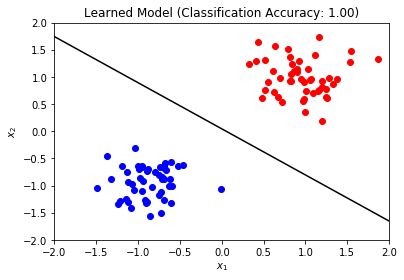

In [63]:
plt.clf()
# Save image of the data distribution
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy: 1.00)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x0[:, 0], x0[:, 1], color="blue")
plt.scatter(x1[:, 0], x1[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)

plt.plot([x_left, x_right], [y_left, y_right], color='k')
plt.show()
#plt.savefig("logistic_pred.png")
